# Discription

The simple statistics of historical intraday equity data are examined in this study. Midprice and Microprice are examined first, followed by Order Unbalance, stamped every 100 millisecond during the trading day. We shall observe that order imbalance has significant auto-correlation and tends to mean-revert. The behaviour of order imbalance just before market order buys or sells come is the next thing we examine.This has the intriguing feature that buy orders typically arrive when the order imbalance is tilted to the buy side, whereas sell orders typically arrive when the order imbalance is tilted to the sell side.

In [2]:
import pandas as pd # for loading pandas data

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# Load Data:

In [3]:
data = sio.loadmat('GOOG_20141126.mat')

In [4]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

# Midprice, Microprice and Spread

In [5]:
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

In [6]:
data = pd.DataFrame(midprice)

In [7]:
data.describe()

,0
count,234000.000000
mean,538.829913
std,0.690640
min,537.070000
25%,538.630000
50%,538.955000
75%,539.255000
max,541.425000


Ploting Midprice:

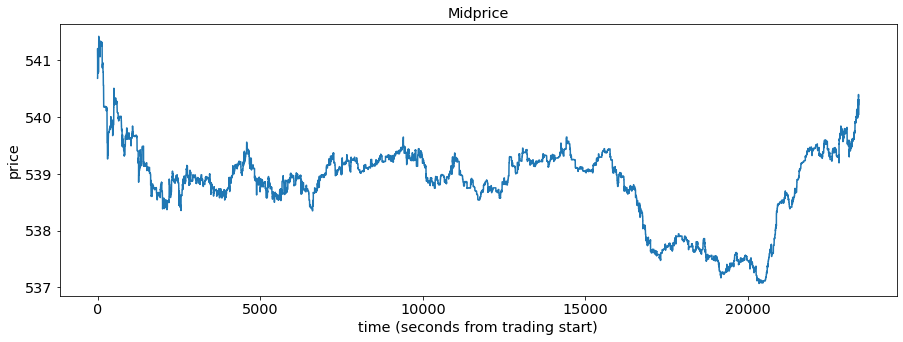

In [8]:
plt.plot(t, midprice)
plt.title('Midprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

Plot Microprice:-

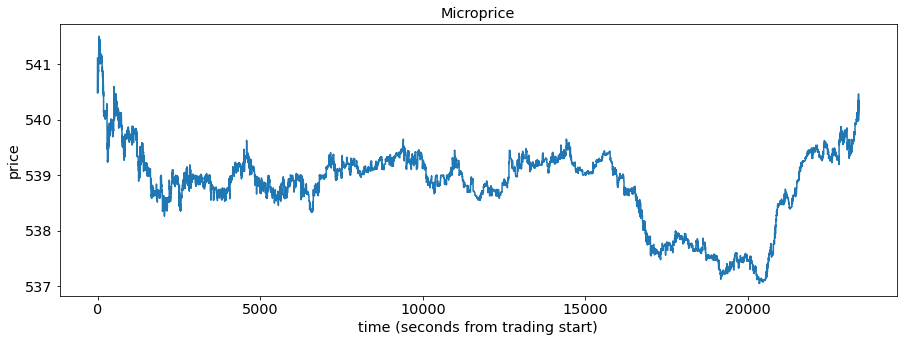

In [9]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

Ploting the difference between Micro and Mid prices:-

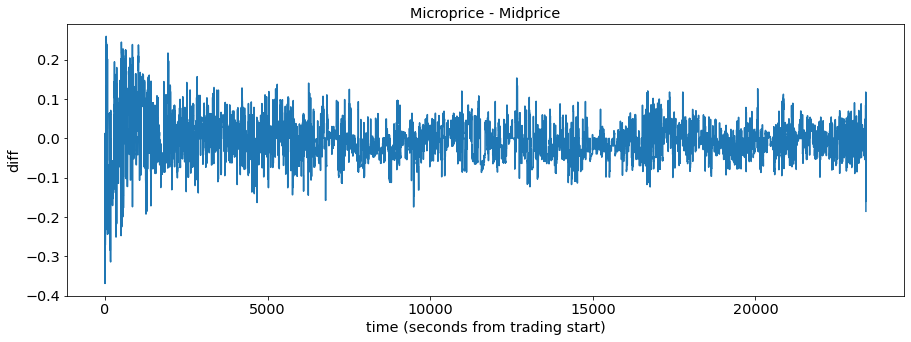

In [10]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

Note:The difference is typically in the range [-0.02, 0.02] while at the beginning of the day it is twice times as large.

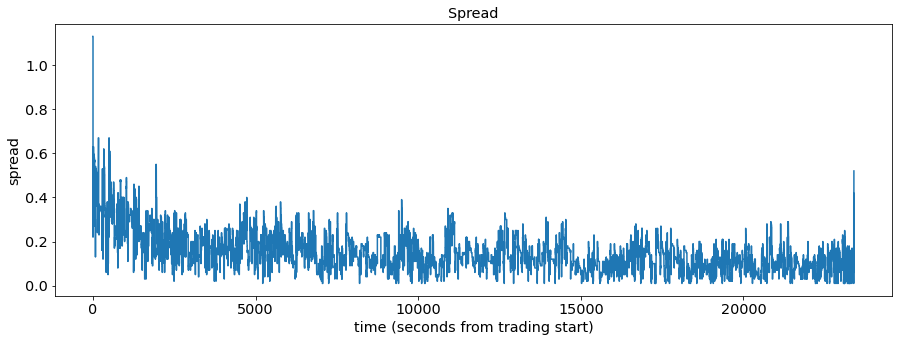

In [11]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

This plot shows that the spread is about 1.9 in the morning, but drops significantly between 0.6 to 0.65 (Mostly in the morning) otherwise it trails below 0.4.

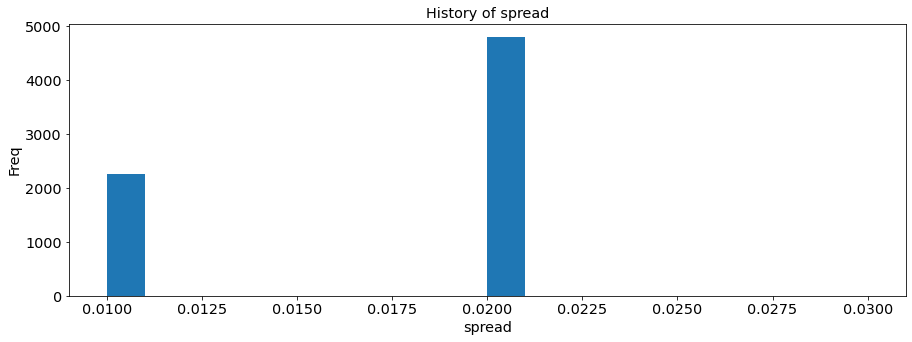

In [12]:
plt.hist(spread,bins=[0.01,0.02,0.03], width=0.001,align='mid') 
plt.title("History of spread")
plt.xlabel(r'spread')
plt.ylabel('Freq')
plt.show()

# Volume Imbalance:-

In [12]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

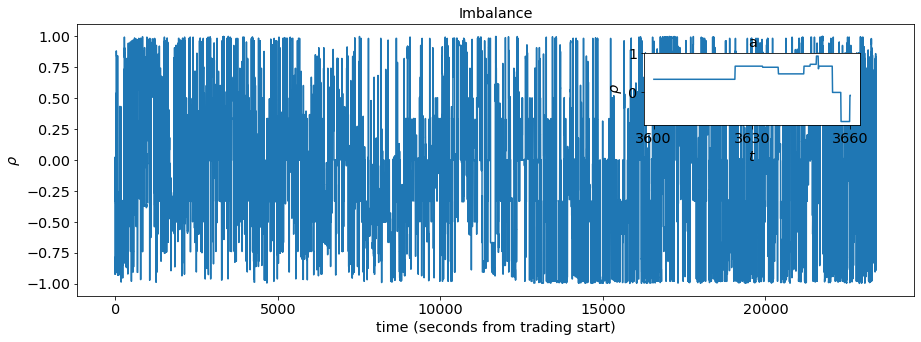

In [13]:
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

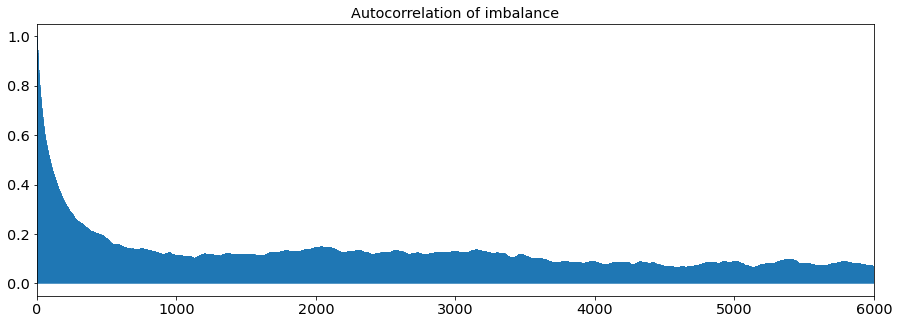

In [15]:
plt.acorr(rho[:,0]-np.mean(rho[:,0]),maxlags=6000)  # maximum one minute 
plt.title('Autocorrelation of imbalance')
plt.xlim([0,6000])
plt.show()

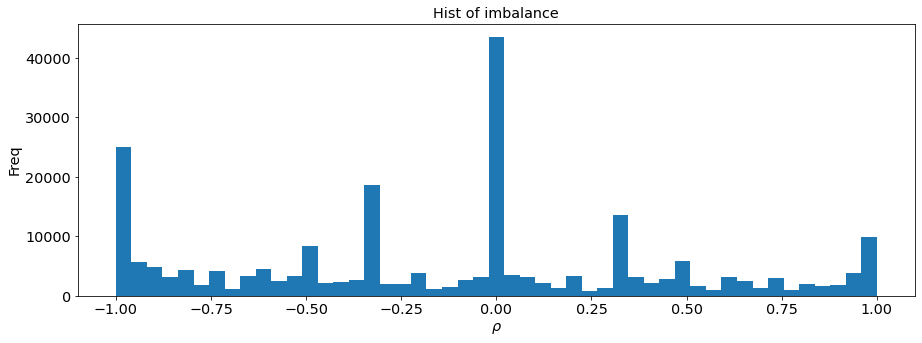

In [16]:
plt.hist(rho, bins=np.linspace(-1, 1, num=50)) 
plt.title("Hist of imbalance")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

# Volume Imbalance at times of Market Orders:-

In [17]:
rho_MO = (MO[:,3]-MO[:,4])/(MO[:,3]+MO[:,4])

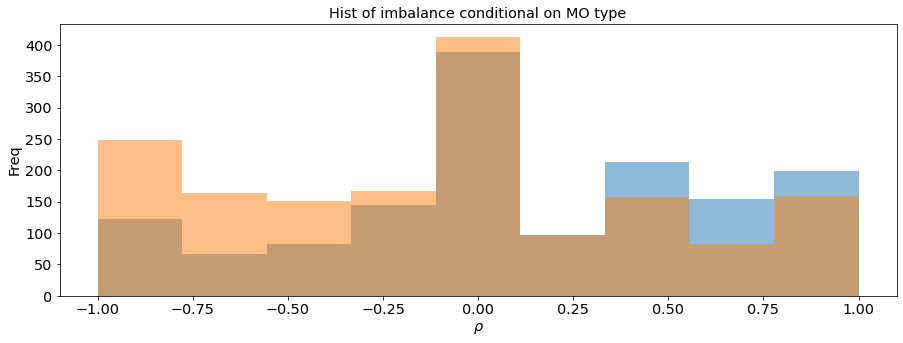

In [18]:
plt.hist(rho_MO[MO[:,7]==-1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.hist(rho_MO[MO[:,7]==+1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.title("Hist of imbalance conditional on MO type")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

# Liquidation Permanent Price Impact

In [19]:
pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import import_ipynb
import Liquidation_Permanent_Price_Impact_helper as lppi_helpers

importing Jupyter notebook from Liquidation_Permanent_Price_Impact_helper.ipynb


In [29]:
T = 1 #Time 
Ndt = 6.5 * 3600
dt = T / Ndt
t = np.arange(0, T + dt, dt)

k = 0.003 #parameter to be set
b = 0.005 #modification can be done

tau = T - t #time left
tt = np.arange(0, 1 + 1 / 10, 1 / 10) 

myphi = np.array([10e-10, 0.001, 0.01, 0.1]) #can do two or three
symb = np.array(["o", "*", "+", "^"])

alpha = 90 #terminal panelty, can change the value

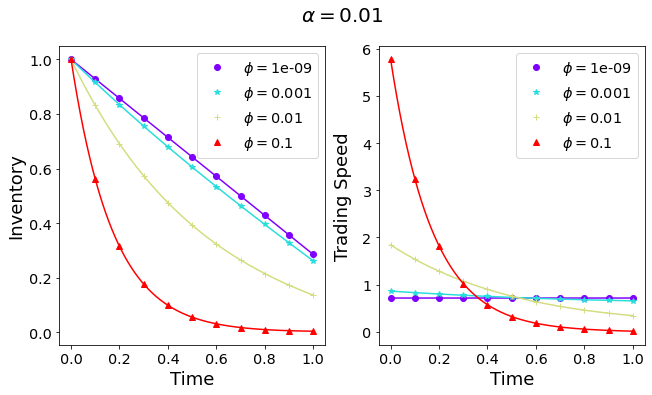

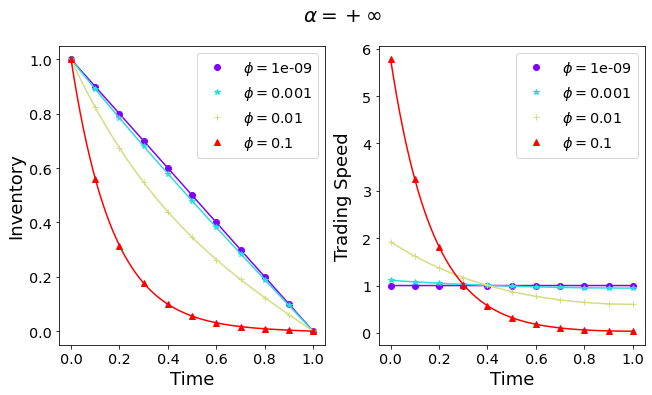

In [30]:
lppi_helpers.plot_inventory_trading_speed(0.01, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.01$")
lppi_helpers.plot_inventory_trading_speed(100, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = +\infty$")

In [31]:
# Parameter Settings
a = np.array([1, 0.8, 0.6])
k = 0.0003
b = 0.0005

phi = 10 * k
alpha = 100 * k
T = 1
qmax = 1

Ndt = 10000
Ndq = 100

dt = T / Ndt
dq = qmax / Ndq

In [32]:
nus, Qs, myleg, t, q = lppi_helpers.solve_pde(T, dt, qmax, dq, k, a, b, alpha, phi, Ndt, Ndq)

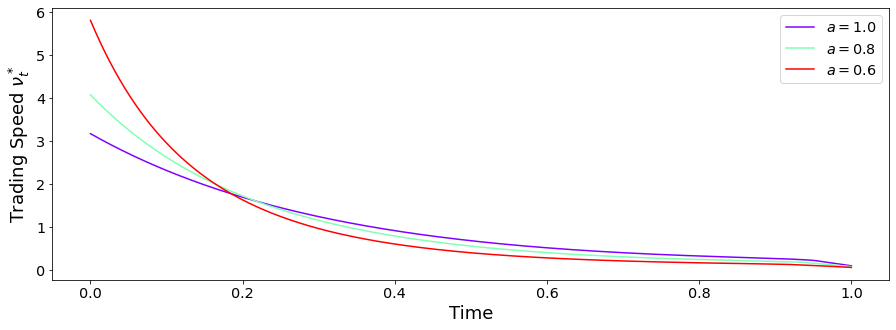

In [33]:
lppi_helpers.plot_multiple(t, nus.T, r"Time", r"Trading Speed $\nu^*_t$", None, myleg)

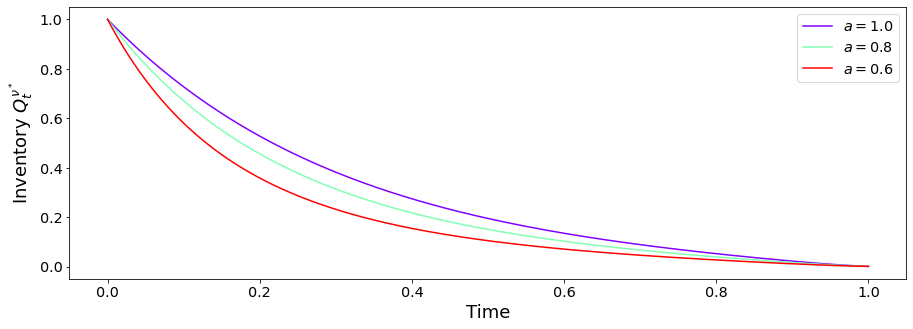

In [34]:
lppi_helpers.plot_multiple(t, Qs.T, r"Time", r"Inventory $Q_t^{\nu^*}$", None, myleg)

# Set up the Parameters:

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# parameters
S0 = 100
N = 10 ** 6 #Initial number of stocks
T = 1; 
k = 1e-3;
b = 1e-5
M = 1000;    #Number of trading times
alpha = 0.09; 
phi = 0.01;
sigma = 0.30;

# Calculate the Rest Parameters:


In [17]:
gamma = np.sqrt(phi/k);
xi = (alpha - 0.5 * b + np.sqrt(k * phi))/(alpha - 0.5 * b - np.sqrt(k * phi));

In [18]:
tt = np.linspace(0, 1, M + 1)

# Optimal Trading Speed and Inventory Process

In [19]:
v = np.zeros((M + 1, 1))
q = np.zeros((M + 1, 1))
v[0] = 0
q[0] = N  
for t in range(1, M + 1): 
    v[t] = gamma * (xi * np.exp(gamma * (T-tt[t-1])) + np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) * q[t-1] * T/M
    q[t] = (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * T) - np.exp(- gamma * T)) * N

Text(0.5, 1.0, 'Trading Speed')

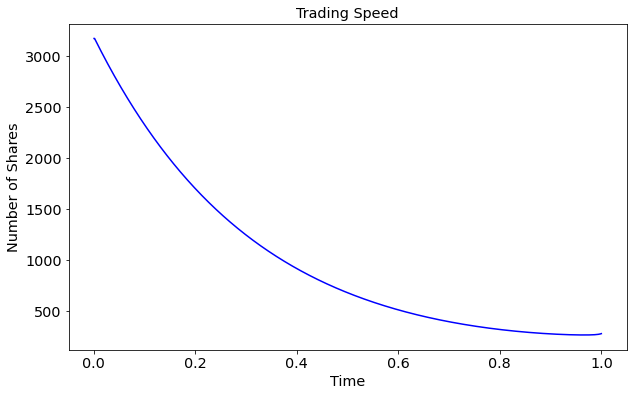

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], v[1:], 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Trading Speed')

Text(0.5, 1.0, 'Inventory')

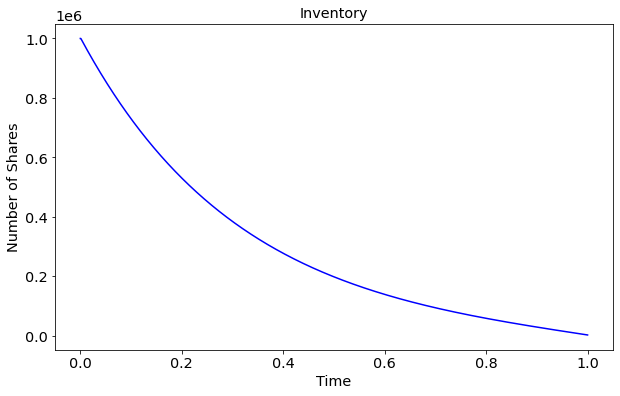

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(tt, q, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Inventory')